In [1]:
print(3333)

3333


In [4]:
from src.preprocessing import preprocess_data

preprocess_data(
    data_path="./example_data/example_data.jsonl",
    deduplicate_threshold=0.9,
    deduplicate_ngram_n=3,
    output_path="example_data/example_math_problem_processed.jsonl",
)

ModuleNotFoundError: No module named 'src'

In [6]:
from datasets import load_dataset

/Users/shawnlin/Documents/Project/2025/sari-data-pipeline/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# IFEval, LiveCodeBench, Arena-Hard
eval_datasets = {
    "aime_2024": (load_dataset("HuggingFaceH4/aime_2024", split="train"), "problem"),
    "aime_2025": (load_dataset("yentinglin/aime_2025", split="train"), "problem"),
    "math_500": (load_dataset("HuggingFaceH4/MATH-500", split="test"), "problem"),
    # "gpqa": (load_dataset("Idavidrein/gpqa", "gpqa_diamond", split="train", trust_remote_code=True), "Question"),
    "gpqa": (
        load_dataset("csv", data_files="../gpqa_diamond.csv", split="train"),
        "Question",
    ),
    "ifeval": (load_dataset("google/IFEval", split="train"), "prompt"),
    "arena_hard": (load_dataset("pvduy/arena-hard", split="train"), "prompt"),
}

In [12]:
eval_datasets["aime_2025"]

(Dataset({
     features: ['id', 'problem', 'answer', 'solution', 'url', 'year', '__index_level_0__'],
     num_rows: 30
 }),
 'problem')

In [13]:
dataset = load_dataset("csv", data_files="../gpqa_diamond.csv", split="train")

In [20]:
"Question" in dataset.features.keys()

True

In [22]:
# Preprocess the benchmark datasets
aime_2024 = load_dataset("HuggingFaceH4/aime_2024", split="train")["problem"]
aime_2025 = load_dataset("yentinglin/aime_2025", split="train")["problem"]
math_500 = load_dataset("HuggingFaceH4/MATH-500", split="test")["problem"]
gpqa = load_dataset("csv", data_files="../gpqa_diamond.csv", split="train")["Question"]
ifeval = load_dataset("google/IFEval", split="train")["prompt"]
arena_hard = load_dataset("pvduy/arena-hard", split="train")["conversation"]

In [43]:
# Arena-Hard
arena_hard_list = []
for conversation in arena_hard:
    if conversation[0].get("role") == "user":
        # print(conversation[0].get("content"))
        # print("------")
        arena_hard_list.append(conversation[0].get("content"))
len(arena_hard_list)

500

In [50]:
# Livecodebench
import json

raw_prompts = []
with open("../livecodebench_v5.jsonl", "r") as f:
    for line in f:
        data = json.loads(line)
        raw_prompts.append(data["prompt"])
        # break
len(raw_prompts)

279

In [49]:
livecodebench_list = []
for prompt in raw_prompts:
    striped_prompt = prompt.lstrip(
        "You will be given a question (problem specification) and will generate a correct Python program that matches the specification and passes all tests.\n\nQuestion: "
    )
    livecodebench_list.append(striped_prompt)
len(livecodebench_list)

279

In [52]:
from typing import Dict, List

results: Dict[str, List[str]] = {}
results["livecodebench"] = livecodebench_list

results["aime_2024"] = aime_2024
results["aime_2025"] = aime_2025
results["math_500"] = math_500
results["gpqa"] = gpqa
results["ifeval"] = ifeval
results["arena_hard"] = arena_hard_list

In [57]:
# Save the results to a json file with nice formatting
with open("../benchmark_data.json", "w") as f:
    json.dump(results, f, indent=4)

In [58]:
# check json
with open("../benchmark_data.json", "r") as f:
    data = json.load(f)
    for key, value in data.items():
        print(key)
        print(len(value))
        print("------")

livecodebench
279
------
aime_2024
30
------
aime_2025
30
------
math_500
500
------
gpqa
198
------
ifeval
541
------
arena_hard
500
------


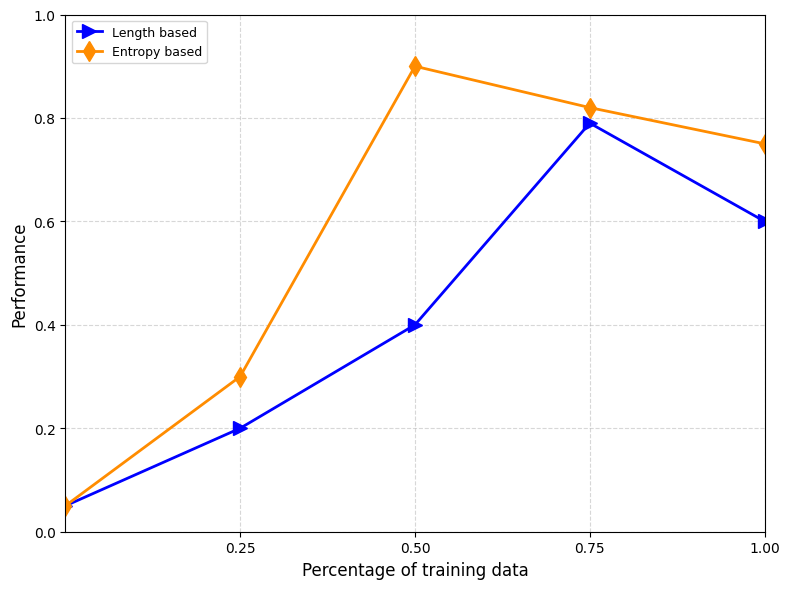

In [74]:
import matplotlib.pyplot as plt

# Sample Data (replace with actual values)
data = {
    "Length based": ([0, 0.25, 0.5, 0.75, 1], [0.05, 0.2, 0.4, 0.79, 0.6], ">", "blue"),
    "Entropy based": (
        [0, 0.25, 0.5, 0.75, 1],
        [0.05, 0.3, 0.9, 0.82, 0.75],
        "d",
        "darkorange",
    ),
    # "LevT (2019)": ([5, 9, 12], [27, 27, 18.5], "D", "forestgreen"),
    # "LaNMT (2020)": ([4, 6, 8, 10, 17], [24, 24, 24, 23.5, 22], "^", "brown"),
    # "DisCo (2020)": ([4, 5, 6, 7, 10, 15], [26, 25.5, 25, 24, 20, 17], "o", "purple"),
    # "Transformer": ([1, 1], [27.5, 27], "s", "mediumpurple"),
    # "Ours": ([17], [27.5], "*", "black")
}

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
for label, (x, y, marker, color) in data.items():
    ax.plot(
        x,
        y,
        marker=marker,
        label=label if label != "Ours" else "",
        color=color,
        markersize=10,
        linewidth=2,
    )

# # Annotation for Transformer
# ax.annotate("12-1", xy=(1, 27.5), xytext=(1.2, 27.7))
# ax.annotate("6-6", xy=(1, 27), xytext=(0.5, 26.2))

# Annotation for "Ours"
# ax.text(17.3, 27.5, "Ours", fontsize=14, fontweight="bold")
# ax.plot(17, 27.5, marker="*", markersize=20, color="black")

# Axis Settings
ax.set_xlabel("Percentage of training data", fontsize=12)
ax.set_ylabel("Performance", fontsize=12)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
# Set custom x-ticks
ax.set_xticks([0.25, 0.5, 0.75, 1.0])

# Legend
ax.legend(loc="upper left", fontsize=9)

# Grid and layout
ax.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
# plt.show()
plt.savefig("length_entropy_based_performance.png", dpi=300)

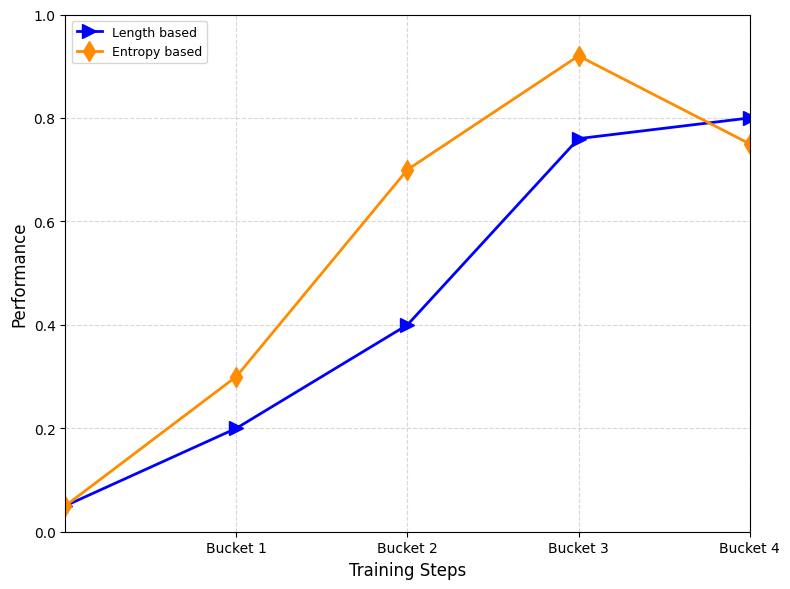

In [78]:
import matplotlib.pyplot as plt

# Sample Data (replace with actual values)
data = {
    "Length based": ([0, 0.25, 0.5, 0.75, 1], [0.05, 0.2, 0.4, 0.76, 0.8], ">", "blue"),
    "Entropy based": (
        [0, 0.25, 0.5, 0.75, 1],
        [0.05, 0.3, 0.7, 0.92, 0.75],
        "d",
        "darkorange",
    ),
    # "LevT (2019)": ([5, 9, 12], [27, 27, 18.5], "D", "forestgreen"),
    # "LaNMT (2020)": ([4, 6, 8, 10, 17], [24, 24, 24, 23.5, 22], "^", "brown"),
    # "DisCo (2020)": ([4, 5, 6, 7, 10, 15], [26, 25.5, 25, 24, 20, 17], "o", "purple"),
    # "Transformer": ([1, 1], [27.5, 27], "s", "mediumpurple"),
    # "Ours": ([17], [27.5], "*", "black")
}

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
for label, (x, y, marker, color) in data.items():
    ax.plot(
        x,
        y,
        marker=marker,
        label=label if label != "Ours" else "",
        color=color,
        markersize=10,
        linewidth=2,
    )

# # Annotation for Transformer
# ax.annotate("12-1", xy=(1, 27.5), xytext=(1.2, 27.7))
# ax.annotate("6-6", xy=(1, 27), xytext=(0.5, 26.2))

# Annotation for "Ours"
# ax.text(17.3, 27.5, "Ours", fontsize=14, fontweight="bold")
# ax.plot(17, 27.5, marker="*", markersize=20, color="black")

# Axis Settings
ax.set_xlabel("Training Steps", fontsize=12)
ax.set_ylabel("Performance", fontsize=12)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
# Set custom x-ticks
ax.set_xticks([0.25, 0.5, 0.75, 1.0])
ax.set_xticklabels(["Bucket 1", "Bucket 2", "Bucket 3", "Bucket 4"])

# Legend
ax.legend(loc="upper left", fontsize=9)

# Grid and layout
ax.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
# plt.show()
plt.savefig("length_entropy_based_performance.png", dpi=300)